<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/trainUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 10개로만 훈련시켜보자 성능을 보자.

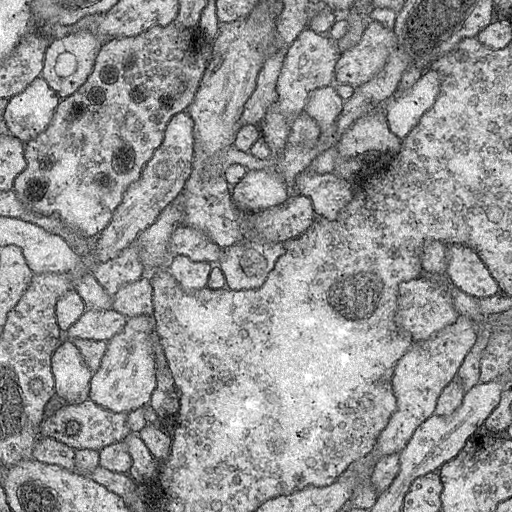

In [ ]:
Image.open('/content/drive/MyDrive/data/membrane/test/0.png')

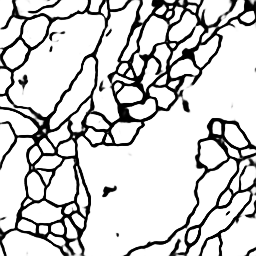

In [ ]:
Image.open('/content/drive/MyDrive/data/membrane/test/0_predict.png')

In [1]:
!git clone https://github.com/hanyoseob/youtube-cnn-002-pytorch-unet.git

Cloning into 'youtube-cnn-002-pytorch-unet'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 65 (delta 29), reused 52 (delta 16), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [2]:
%cd /content/youtube-cnn-002-pytorch-unet

/content/youtube-cnn-002-pytorch-unet


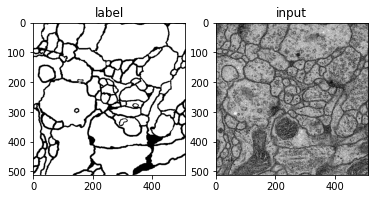

In [3]:
## 필요한 패키지 등록
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = './datasets'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

##
nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)

if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)

##
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

##
offset_nframe = 0

for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)

##
offset_nframe = nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), input_)

##
offset_nframe = nframe_train + nframe_val

for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), input_)

##
plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()


In [5]:
# batch size = 2로 만들어라!
!python train.py

learning rate: 1.0000e-03
batch size: 2
number of epoch: 100
data dir: ./datasets
ckpt dir: ./checkpoint
log dir: ./log
result dir: ./result
mode: train
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to 

In [7]:
'''
data_dir = './datasets'
ckpt_dir = './checkpoint'
log_dir = './log'
result_dir = './results'
으로 설정해놔라.
'''

!python3 eval.py

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
TEST: BATCH 0001 / 0001 | LOSS 0.2264
AVERAGE TEST: BATCH 0001 / 0001 | LOSS 0.2264


In [ ]:
data2 = np.load('/content/youtube-cnn-002-pytorch-unet/datasets/test/1.npy')
data2.shape

(512, 512)

### 결과....

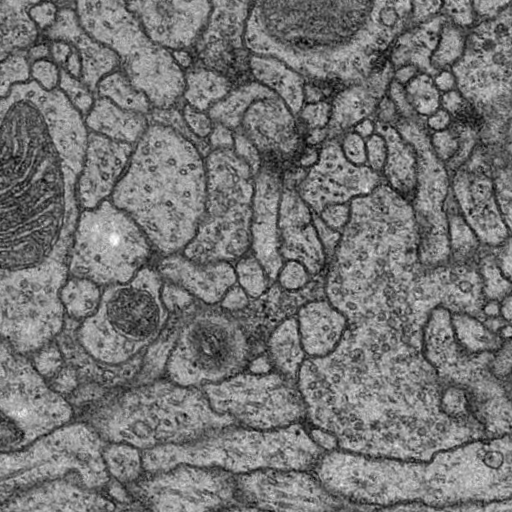

In [12]:
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/input_0000.png')

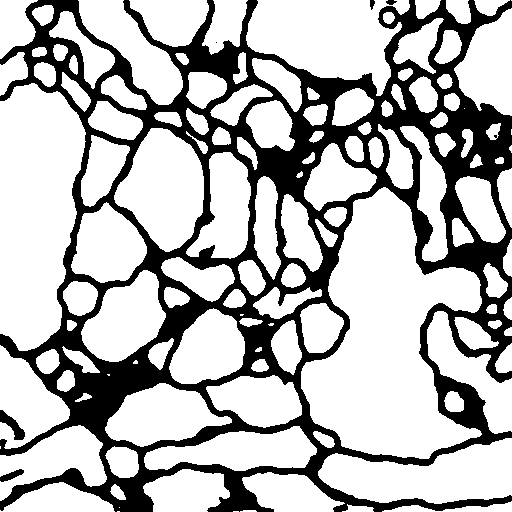

In [14]:
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/output_0000.png')

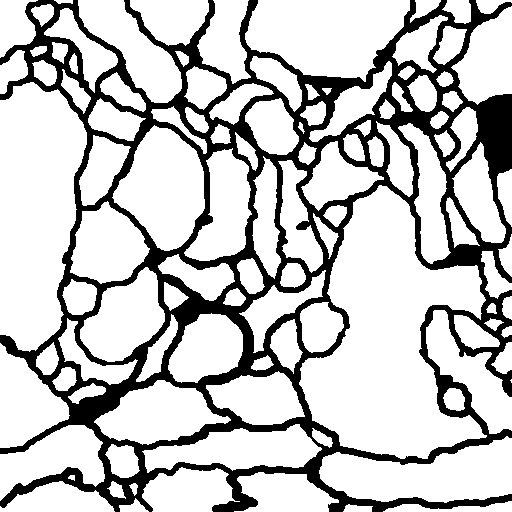

In [13]:
Image.open('/content/youtube-cnn-002-pytorch-unet/results/png/label_0000.png')